# Lab 4. Homework

In this homework you will implement a Jackknife residuals from scratch.

***Note:*** the detailed description of Jackknife will be provided later in the course.

## Necessary imports & data definition

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Text(0.5, 1.0, 'Generated data')

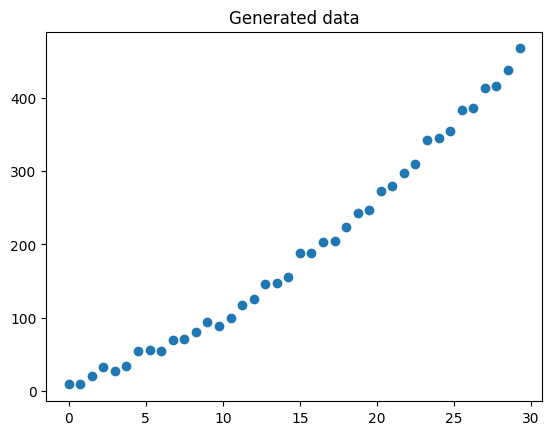

In [5]:
np.random.seed(42)
X = np.arange(0, 30, 0.75).reshape(-1, 1)
Y = 5 + 7 * X + 0.3 * X ** 2 + 7 * np.random.randn(*X.shape)

plt.scatter(X, Y)
plt.title('Generated data')

In [6]:
def polyreg_model(degree):
  return Pipeline([
      ('polynomial_features', PolynomialFeatures(degree)),
      ('linear_regression', LinearRegression())
  ])

## Simple residuals

The basic form of residuals is given as:

$$
  e_i = y_i - \hat{y}_i
$$

where $y_i$ - is a true value of the response and $\hat{y}_i$ - is a model prediction.

<font color='red'>TODO: compute simple residuals for `polyreg_model` of degree 1 and draw a scatter plot for residuals against the predicted values.</font>

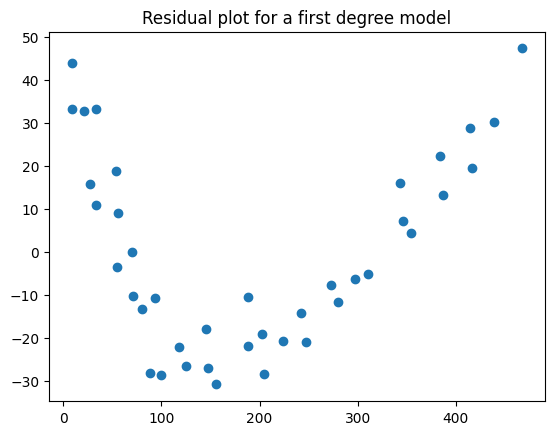

In [49]:
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
# plt.scatter(X,y_pred,color='red')
# plt.title("Residual plot for a first degree model")
# plt.scatter(X,Y)
# plt.show()
plt.scatter(Y,residuals)
plt.title("Residual plot for a first degree model")
plt.show()

**What can you say about the behaviour of the model? (Overfit/underfit/perfect fit). Provide an argument.**

<font>This model underfit, as we can see if we'll draw exact Y(x) and y_pred(x) graphs. But the residuals are normally distributed, so we can say that this model almost perfect fit the exact data</font>

Now, <font color='red'>repeat the same process for the 2nd degree model:</font>

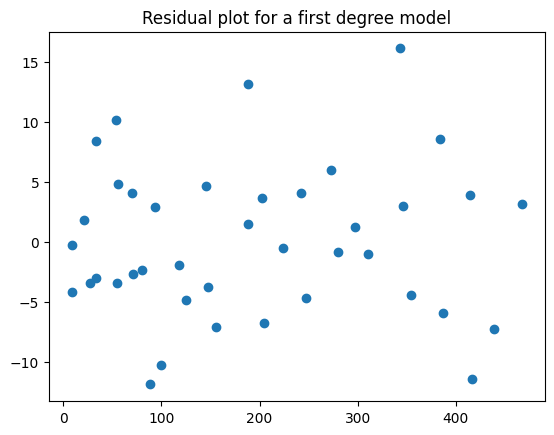

In [50]:
model = polyreg_model(2)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(Y,residuals)
plt.title("Residual plot for a first degree model")
plt.show()


**What do you see? Compare to a previous result.**

<font> We can see that the error became much less in compare with 1st degree polinomial, therefore 2nd degree polynomial fits much better to this task. If we'll draw graphs, we'll see that it is true. </font>

## Jacknife residuals
The Jacknife residual (or R-Student residual) is defined as

$$
  r_{(-1)} = \frac{e_i}{\sqrt{MSE_{(-i)}(1 - h_i)}}
$$

where $MSE_{(-i)}$ is a residual MSE computed withoit $i$th observation. We compute $MSE = \frac{\sum e_i^2}{n - p - 1}$ where $p$ is a number of features. $h_i$ is $i$th diagonal element of the projection matrix $H = X(X^TX)^{-1}X^T$.

<font color='red'>TODO: finalize the Jackknife residuals. Draw a residual plots for the 1st and 2nd degree models and compare those to ones you had before.</font>

If an observation has a Jackknife residual that is larger than 3 (in absolute value) we can call it an *outlier*.

In [46]:
import math
def jackknife_residuals(X, y, y_pred, p):
    residuals = Y - y_pred
    X_tr = np.transpose(X)
    X_tr_X = np.dot(X_tr, X)
    X_tr_X_inv = np.linalg.inv(X_tr_X)
    X_tr_X_inv_X_tr = np.dot(X_tr_X_inv, X_tr)
    H = np.dot(X, X_tr_X_inv_X_tr)
    res2 = residuals * residuals
    res2_sum = res2.sum()
    MSE = res2_sum / (X.size - p - 1)
    r1 = []
    for i in range(X.size):
        denominator  = math.sqrt(MSE * (1 - H[i][i]))
        r1.append(residuals[i]/denominator)
    return r1

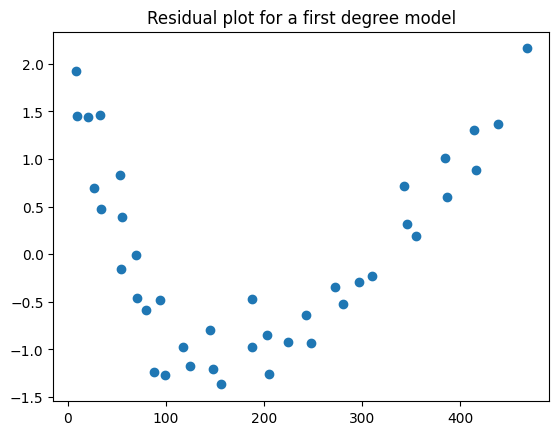

In [52]:
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
j_r = jackknife_residuals(X, Y, y_pred, X.shape[1])
plt.scatter(Y,j_r)
plt.title("Residual plot for a first degree model")
plt.show()

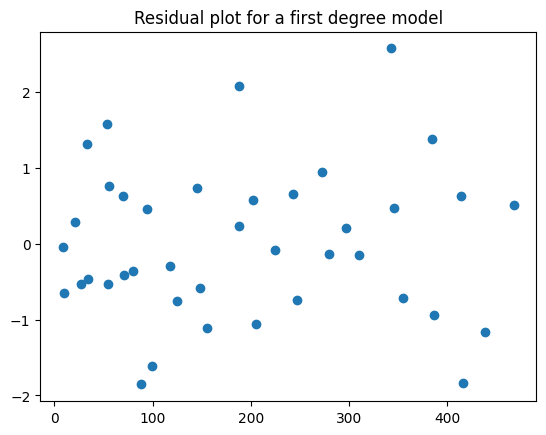

In [53]:
model = polyreg_model(2)
model.fit(X, Y)
y_pred = model.predict(X)
j_r = jackknife_residuals(X, Y, y_pred, X.shape[1])
plt.scatter(Y,j_r)
plt.title("Residual plot for a first degree model")
plt.show()

**How new residual plots compare to the ones we had before?**

<font> This new graphs follow the same normal distribution and doesn't have any outliers. We can say that our model performs really good and every point brings an impact and there are no need to exclude some special points from our set.</font>